# Using classifier ensemble


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv("c:/users/HP/Dropbox/Breast Cancer ML Project/breast-cancer-wisconsin-data/data.csv")
cancer_df = df.copy()    # CREATING A COPY OF THE ORIGINAL DATAFRAME
print("Shape of the data : " , cancer_df.shape )
cancer_df.head(5 )

Shape of the data :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Preprocessing

In [3]:
y = cancer_df.diagnosis.values 

cancer_df.drop(["Unnamed: 32" , "id", "diagnosis"] , axis = 1 , inplace= True ) 
cancer_df.head(3) 
X = cancer_df.values 

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X )
scaled_x = scaler.transform(X) 
# scaled_X is the new X 

# cross validation

In [6]:
from sklearn.model_selection import KFold 

kfold = KFold(n_splits = 10 , shuffle = True , random_state= 4 )

In [7]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = "liblinear")

In [8]:
# Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(max_depth= 5, random_state= 5 ) 

In [9]:
# KNN  model 
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier(n_neighbors= 5  ) 

# voting ensemble

In [10]:
from sklearn.ensemble import VotingClassifier 

In [11]:
accuracy = [] 
ensemble = [] 

 <p style = "color:black; font-family :monospace ;font-size :30px ;">Logistic Regression + Decision Tree + KNN </p>

In [12]:
estimators = [("logistic" , log_model) , ("tree" , tree_model) , ("knn" , knn_model ) ]
classifier = VotingClassifier(estimators = estimators ) 

In [13]:
fold_accuracy = []
for train , test in  kfold.split(scaled_x , y ) : 
    X_train , X_test= scaled_x[train ] , scaled_x[test]
    y_train , y_test = y[train ] , y[test ]
    classifier.fit(X_train , y_train  )
    fold_accuracy.append(classifier.score(X_test , y_test))
  
score = round(sum(fold_accuracy)*10 , 2 )
print(score)
accuracy.append(score) 
ensemble.append("Log+DT+KNN")    

97.54


<p style = "color:blue; font-family :monospace ;font-size :20px "> An ensemble of Logistic Regression , Decision Tree and KNN gives an accuracy of <b>97.54</b> </p>

<p style = "color:black; font-family :monospace ;font-size :30px ">Linear + rbf + poly + sigmoid kernels </p>

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
C = [1, 10 ,100 ,1000 ] 
gamma = [1 , 0.1 , 0.01 , 0.001 ]
kernels = ["rbf" ]
param_grid = {"C" : C , "gamma" : gamma , "kernel" : kernels }

In [15]:
linear = GridSearchCV(estimator= SVC() , param_grid={"C":C, "gamma":gamma ,"kernel":["linear"] } ,verbose = 4 )
rbf = GridSearchCV(estimator = SVC() , param_grid = {"C" :C , "gamma":gamma ,"kernel" : ["rbf"] } , verbose = 4 )
poly = GridSearchCV(estimator = SVC() , param_grid = {"C" :C , "gamma":gamma ,"kernel" : ["poly"] } , verbose = 4 )
sigmoid = GridSearchCV(estimator = SVC() , param_grid = {"C" :C , "gamma":gamma ,"kernel" : ["sigmoid"] } , verbose = 4 )


svc_estimators = [ ("linear" ,linear) , ("rbf" , rbf) , ("poly" , poly) , ("sigmoid" , sigmoid)]

classifier = VotingClassifier(estimators = svc_estimators )
fold_accuracy = [] 
for train ,test in kfold.split(scaled_x) :
    X_train , X_test = scaled_x[train ] , scaled_x[test]
    y_train , y_test = y[train ] , y[test] 
    classifier.fit(X_train , y_train )
    fold_accuracy.append(classifier.score(X_test, y_test))
 
score = round(sum(fold_accuracy *10)  , 2)
accuracy.append(score)     
ensemble.append("linear+rbf+poly+sigmoid")

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9767441860465116, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9767441860465116, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9476744186046512, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9294117647058824, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9767441860465116, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, score=0.7411764705882353, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, score=0.7705882352941177, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6162790697674418, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6176470588235294, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6176470588235294, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9476744186046512, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.952

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.813953488372093, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.888235294117647, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8764705882352941, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9069767441860465, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9294117647058824, total=   0.0s
[CV] C=100, gamma=0.

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.1, ker

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9239766081871345, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf .................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=poly, score=0.7251461988304093, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, score=0.7588235294117647, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6198830409356725, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6198830409356725, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.6235294117647059, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8654970760233918, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gam

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.6257309941520468, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .........................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=poly, score=0.6666666666666666, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6470588235294118, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9117647058823529, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9298245614035088, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=poly ..................................
[CV]  C=1000, gamma=0.1, kernel=poly, score=0.9590643274853801, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=p

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.001, kernel=line

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf .............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=poly, score=0.9239766081871345, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9294117647058824, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.8771929824561403, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.8947368421052632, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6608187134502924, total=   0.0s
[CV] C=100, gamma=0.001, kerne

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV]  C=10, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8947368421052632, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9181286549707602, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.888235294117647, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.00

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9244186046511628, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, k

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=poly, score=0.9117647058823529, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.936046511627907, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9117647058823529, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.8953488372093024, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9058823529411765, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.001, kernel=pol

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.872093023255814, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9235294117647059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9418604651162791, total=   0.0s
[CV] C=10, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=linear, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=10, gamma=1, kernel=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6198830409356725, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf .................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=poly, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV]  C=100, gamma=0.1, kernel=poly, score=0.9352941176470588, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.8888888888888888, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9064327485380117, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9352941176470588, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6549707602339181, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6666666666666666, total=   0.0s
[CV] C=100, gamma=0.001, ker

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8538011695906432, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9064327485380117, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9651162790697675, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1, gamma=0.001, kerne

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=poly, score=0.8941176470588236, total=   0.0s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV]  C=100, gamma=0.01, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6686046511627907, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6764705882352942, total=   0.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV]  C=100, gamma=0.001, kernel=poly, score=0.6588235294117647, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.936046511627907, total=   0.0s
[CV] C=1000, gamma=1, kernel=poly ....................................
[CV]  C=1000, gamma=1, kernel=poly, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=1, kernel=p

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.8488372093023255, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.8588235294117647, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV]  C=10, gamma=1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.8837209302325582, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] ....... C=10, gamma=0.1, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, 

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9882352941176471, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9294117647058824, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV]  C=10, gamma=0.1, kernel=poly, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV]  C=10, gamma=0.01, kernel=poly, score=0.8654970760233918, total=   0.0s
[CV] C=10, gamma=0.01, kernel=poly ............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9122807017543859, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9235294117647059, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9411764705882353, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6411764705882353, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9418604651162791, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9534883720930233, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9470588235294117, t

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=poly, score=0.9352941176470588, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9186046511627907, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9470588235294117, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9764705882352941, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ......... C=1, gamma=0.01, kernel=poly, score=0.75, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, score=0.7529411764705882, total=   0.0s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV]  C=1, gamma=0.01, kernel=poly, score=0.788235294117647, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9767441860465116, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8023255813953488, total=   0.0s
[CV] C=100, g

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.01, kernel=poly, score=0.7719298245614035, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV]  C=1, gamma=0.001, kernel=poly, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.935672514619883, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV]  C=10, gamma=1, kernel=poly, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ...............

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9766081871345029, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.7953216374269005, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8538011695906432, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8713450292397661, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9181286549707602, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


In [16]:
print(score)

97.71


<p style = "color:blue; font-family :monospace ;font-size :20px "> Ensemble of linear , rbf , poly and sigmoid kernels gives an accuracy of <b>97.71</b> </p>

# Combining all classifiers

In [17]:
# log_model + knn_model + tree_model + linear + rbf + poly + sigmoid
all_estimators = [("log_model" , log_model), ("knn_model" , knn_model) ,("tree_model" , tree_model) ,  
                  ("linear" , linear) , ("rbf" , rbf)  , ("sigmoid" , sigmoid) ]

classifier = VotingClassifier(estimators = all_estimators )
fold_accuracy = [] 
for train ,test in kfold.split(scaled_x) :
    X_train , X_test = scaled_x[train ] , scaled_x[test]
    y_train , y_test = y[train ] , y[test] 
    classifier.fit(X_train , y_train )
    fold_accuracy.append(classifier.score(X_test, y_test))

score = round(sum(fold_accuracy)*10 , 2 )
accuracy.append(score)
ensemble.append("ALL")

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9767441860465116, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9767441860465116, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .....................

[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.622093023255814, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9476744186046512, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9294117647058824

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9767441860465116, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.622093023255814, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ..........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9294117647058824, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9186046511627907, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9825581395348837, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kern

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=rbf, score=0.6198830409356725, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9352941176470588, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9239766081871345, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9239766081871345, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.01,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8362573099415205, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8888888888888888, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8529411764705882, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9122807017543859, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9064327485380117, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.9235294117647059, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9298245614035088, total=   0.0s
[CV] C=100, gamma=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=linear, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.01, kernel=lin

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9298245614035088, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.96491

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.7894736842105263, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8830409356725146, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV] ....... C=1000, gamma=1, kernel=sigmoid, score=0.9, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=1000, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9352941176470588, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9825581395348837, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9764705882352941, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.813953488372093, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.00

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.7953216374269005, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.9058823529411765, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.8538011695906432, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9239766081871345, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.888235294117647, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=sigmoid ..............................
[CV]  C=1000, gamma=0.01, kernel=sigmoid, score=0.935672514619883, total=   0.0s
[CV] C=1000, g

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.936046511627907, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.936046511627907, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6395348837209303, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6352941176470588, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6411764705882353, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.94117647058823

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9764705882352941, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8488372093023255, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8588235294117647, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV]  C=100, gamma=1, kernel=sigmoid, score=0.8764705882352941, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8604651162790697, total=   0.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV]  C=100, gamma=0.1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=100, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9181286549707602, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.935672514619883, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6257309941520468, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9239766081871345, total=   0.0s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9176470588235294, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=10, gam

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV]  C=10, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV]  C=10, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV]  C=10, gamma=0.01, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.01, kernel=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9588235294117647, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9767441860465116, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9882352941176471, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .........

[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9476744186046512, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9470588235294117, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV]  C=100, gamma=0.01, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9709302325581395, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=sigmoid, score=0.9823529411764705, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8023255813953488, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.8941176470588236, total=   0.0s
[CV] C=1000, gamma=1, kernel=sigmoid .................................
[CV]  C=1000, gamma=1, kernel=sigmoid, score=0.888235294117647, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9186046511627907, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9235294117647059, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=sigmoid ...............................
[CV]  C=1000, gamma=0.1, kernel=sigmoid, score=0.9529411764705882, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9298245614035088, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6374269005847953, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6374269005847953, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf ....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=sigmoid, score=0.9005847953216374, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9824561403508771, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9766081871345029, total=   0.0s
[CV] C=100, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


In [18]:
print(score)

97.71


<p style = "color:blue; font-family :monospace ;font-size :20px "> Combining all classifier gives an accuracy of <b>97.71</b> </p>

<p style = "color:black; font-family :monospace ;font-size :30px ">KNN + Tree + rbf </p>

In [19]:
# KNN + Tree + rbf 

new_estimators = [("knn_model" , knn_model)  , ("tree_model" , tree_model) , ("rbf" , rbf)] 
classifier = VotingClassifier(estimators = new_estimators)

fold_accuracy = []
for train , test in kfold.split(scaled_x) :
    X_train , X_test = scaled_x[train] , scaled_x[test]
    y_train , y_test = y[train] , y[test]
    classifier.fit(X_train , y_train )
    fold_accuracy.append(classifier.score(X_test, y_test))
    
score =  round(sum(fold_accuracy)*10 , 2)   
accuracy.append(score) 
ensemble.append("KNN+DT+rbf")

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.622093023255814, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6176470588235294, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6235294117647059, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9534883720930233, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9415204678362573, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9352941176470588, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.976608187134

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ..........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9470588235294117, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9709302325581395, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9411764705882353, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9707602339181286, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9823529411764705, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9593023255813954, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9529411764705882, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9764705882352941, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6395348837209303, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6352941176470588, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV]  C=100, gamma=1, kernel=rbf, score=0.6411764705882353, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV]  C=100, gamma=0.1, kernel=rbf, score=0.9302325581395349, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ...........

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6257309941520468, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6294117647058823, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9766081871345029, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6453488372093024, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6411764705882353, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.6470588235294118, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9418604651162791, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9647058823529412, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.6374269005847953, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.9532163742690059, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9649122807017544, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9590643274853801, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.9824561403508771, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


In [20]:
print(score ) 

98.06


<p style = "color:blue; font-family :monospace ;font-size :20px "> Ensemble of KNN , Decision Tree and RBF classifier gives an accuracy of <b>98.06</b> </p>

<p style = "color:black; font-family :monospace ;font-size :30px ">KNN + Tree + Linear  </p>

In [21]:
# KNN +  Tree + linear 

new_estimators = [("knn_model" , knn_model), ("tree_model" , tree_model) , ("linear" , linear)] 
classifier = VotingClassifier(estimators = new_estimators)

fold_accuracy = []
for train , test in kfold.split(scaled_x) :
    X_train , X_test = scaled_x[train] , scaled_x[test]
    y_train , y_test = y[train] , y[test]
    classifier.fit(X_train , y_train )
    fold_accuracy.append(classifier.score(X_test, y_test))
 
score = round(sum(fold_accuracy)*10 , 2)
accuracy.append(score) 
ensemble.append("KNN+DT+linear")

D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9767441860465116, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV]  C=1, gamma=1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9767441860465116, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV]  C=1, gamma=0.1, kernel=linear, score=0.9823529411764705, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear .....................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamm

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=1000, gamma=0.1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV]  C=100, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9181286549707602, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9181286549707602, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9532163742690059, total=   0.0s
[CV] C=100, gamma=0.01,

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9470588235294117, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV]  C=100, gamma=0.1, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9298245614035088, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.935672514619883, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.00

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.936046511627907, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.936046511627907, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9529411764705882, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9707602339181286, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9705882352941176, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=linear ...............................
[CV]  C=1000, gamma=0.01, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.01, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.01, kernel=linear ................................
[CV]  C=100, gamma=0.01, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9647058823529412, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9127906976744186, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9588235294117647, total=   0.0s
[CV] C=1000, ga

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.2s finished
D:\Softwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, gamma=0.001, kernel=linear, score=0.9590643274853801, total=   0.0s
[CV] C=100, gamma=0.001, kernel=linear ...............................
[CV]  C=100, gamma=0.001, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV]  C=1000, gamma=1, kernel=linear, score=0.9649122807017544, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9415204678362573, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=linear ................................
[CV]  C=1000, gamma=0.1, kernel=linear, score=0.9473684210526315, total=   0.0s
[CV] C=1000, gamma

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


In [22]:
print(score)

97.54


<p style = "color:blue; font-family :monospace ;font-size :20px "> Ensemble of KNN , Decision Tree and linear classifier gives an accuracy of <b>97.54</b> </p>

# Visualization 

In [23]:
ensemble_df = pd.DataFrame({"Ensemble":ensemble , "Accuracy" : accuracy }) 
ensemble_df

,Ensemble,Accuracy
0,Log+DT+KNN,97.54
1,linear+rbf+poly+sigmoid,97.71
2,ALL,97.71
3,KNN+tree+rbf,98.06
4,KNN+tree+linear,97.54


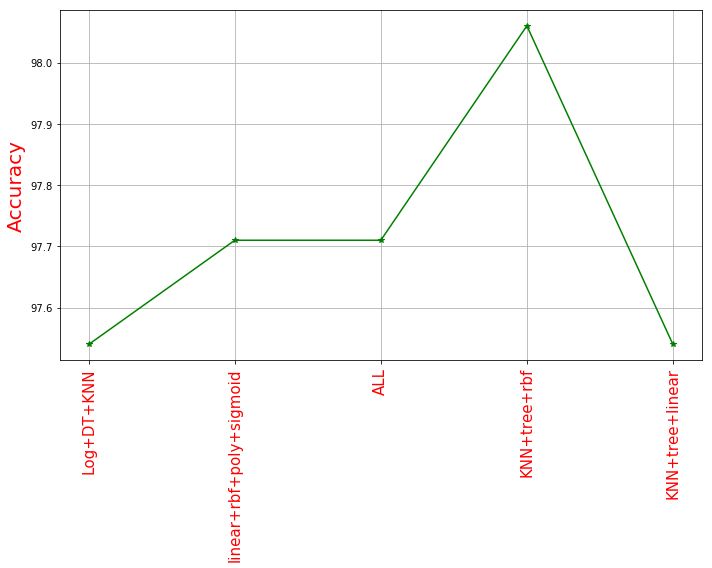

In [29]:
plt.figure(figsize = (10, 8)) 
plt.plot( ensemble , accuracy , marker = "*" , color = "green")
plt.ylabel("Accuracy" , color = "red" , fontsize= 20 )
plt.xticks(color = "red" , fontsize = 15 , rotation = 90) 
plt.grid(True)
plt.tight_layout()
plt.savefig("ensemble.png")
plt.show()
